# Assignment 3: Non-Linear Models and Validation Metrics (37 total marks)
### Due: October 24 at 11:59pm

### Name: Nick Nikolov

### In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Regression (14.5 marks)

For this section, we will be continuing with the concrete example from yellowbrick. You will need to compare these results to the results from the previous assignment. Please use the results from the solution if you were unable to complete Assignment 2

### Step 1: Data Input (0.5 marks)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [2]:
# TO DO: Import concrete dataset from yellowbrick library
from yellowbrick.datasets import load_concrete

X, y = load_concrete()
print(X)
print(y)

      cement   slag    ash  water  splast  coarse   fine  age
0      540.0    0.0    0.0  162.0     2.5  1040.0  676.0   28
1      540.0    0.0    0.0  162.0     2.5  1055.0  676.0   28
2      332.5  142.5    0.0  228.0     0.0   932.0  594.0  270
3      332.5  142.5    0.0  228.0     0.0   932.0  594.0  365
4      198.6  132.4    0.0  192.0     0.0   978.4  825.5  360
...      ...    ...    ...    ...     ...     ...    ...  ...
1025   276.4  116.0   90.3  179.6     8.9   870.1  768.3   28
1026   322.2    0.0  115.6  196.0    10.4   817.9  813.4   28
1027   148.5  139.4  108.6  192.7     6.1   892.4  780.0   28
1028   159.1  186.7    0.0  175.6    11.3   989.6  788.9   28
1029   260.9  100.5   78.3  200.6     8.6   864.5  761.5   28

[1030 rows x 8 columns]
0       79.986111
1       61.887366
2       40.269535
3       41.052780
4       44.296075
          ...    
1025    44.284354
1026    31.178794
1027    23.696601
1028    32.768036
1029    32.401235
Name: strength, Length: 1030, dty

### Step 2: Data Processing (0 marks)

Data processing was completed in the previous assignment. No need to repeat here.

### Step 3: Implement Machine Learning Model

1. Import the Decision Tree, Random Forest and Gradient Boosting Machines regression models from sklearn
2. Instantiate the three models with `max_depth = 5`. Are there any other parameters that you will need to set?
3. Implement each machine learning model with `X` and `y`

### Step 4: Validate Model

Calculate the average training and validation accuracy using mean squared error with cross-validation. To do this, you will need to set `scoring='neg_mean_squared_error'` in your `cross_validate` function and negate the results (multiply by -1)

### Step 5: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [3]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
tree = DecisionTreeRegressor(random_state=0, max_depth=5)
tree.fit(X_train, y_train)

rf_model = RandomForestRegressor(n_estimators=10, max_features = 1.0, random_state=0, max_depth=5)
rf_model.fit(X_train, y_train)

gb_model = GradientBoostingRegressor(random_state=0, n_estimators=100,  max_depth = 5)
gb_model.fit(X_train, y_train)

gb_scores = cross_validate(gb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
rf_scores = cross_validate(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
tree_scores = cross_validate(tree, X_train, y_train, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

train = [tree_scores['train_score'].mean(), rf_scores['train_score'].mean(), gb_scores['train_score'].mean()]
test = [tree_scores['test_score'].mean(), rf_scores['test_score'].mean(), gb_scores['test_score'].mean()]
index = ["DT", "RF", "GB"]

results = pd.DataFrame({
    "Training Accuracy (MSE)": train,
    "Validation Accuracy (MSE)": test},
    index = index
)

results = results.multiply(-1)
results

,Training Accuracy (MSE),Validation Accuracy (MSE)
DT,47.279761,73.447331
RF,32.723495,50.292588
GB,3.379440,22.783221


Repeat the step above to print the R2 score instead of the mean-squared error. For this case, you can use `scoring='r2'`

In [4]:
# TO DO: ADD YOUR CODE HERE
gb_scores = cross_validate(gb_model, X_train, y_train, cv=5, scoring='r2', return_train_score=True)
rf_scores = cross_validate(rf_model, X_train, y_train, cv=5, scoring='r2', return_train_score=True)
tree_scores = cross_validate(tree, X_train, y_train, cv=5, scoring='r2', return_train_score=True)

train_r2 = [tree_scores['train_score'].mean(), rf_scores['train_score'].mean(), gb_scores['train_score'].mean()]
test_r2 = [tree_scores['test_score'].mean(), rf_scores['test_score'].mean(), gb_scores['test_score'].mean()]

results_r2 = pd.DataFrame({
    "Training Accuracy (r2)": train_r2,
    "Validation Accuracy (r2)": test_r2},
    index = index
)

print(results_r2)

    Training Accuracy (r2)  Validation Accuracy (r2)
DT                0.834465                  0.738697
RF                0.885532                  0.822623
GB                0.988171                  0.919471


### Questions (6 marks)
1. How do these results compare to the results using a linear model in the previous assignment? Use values.
2. Out of the models you tested, which model would you select for this dataset and why?
3. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.

*ANSWER HERE*

1. All 3 regressors proviide much better accuracy than the linear models. The linear models all provided roughly 0.62 r2 scores, while these non-linear models are all scoring at roughly 0.8 or higher on the validation data.

2. I think randomforrests would be the best model to use on this dataset. Random forrests had a higher r2 validation score, and a lower mean squared error.

3. To increase the accuracy we can increase the depth of the tree. Being careful not to increase the depth too much which would result in overfitting. For the random forrest regressor, we can increase the number of estimators.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
2. In what order did you complete the steps?
3. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
4. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

1. Majority was from the Examples tab in D2L, and sklearn documentation.

2. Numerical order.

3. I didn't use generative AI! (very proud of myself). I think because Assignment 2 was quite similar. Also the lecture notes helped to decide which parameters I needed to add to the models. 

4. I accidentally tried using classifiers instead of regressors. Classifiers only work on discrete target vectors, so I should have recognized instantly. But it took me longer than it should have to realize what was going on!

## Part 2: Classification (17.5 marks)

You have been asked to develop code that can help the user classify different wine samples. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 1: Data Input (2 marks)

The data used for this task can be downloaded from UCI: https://archive.ics.uci.edu/dataset/109/wine

Use the pandas library to load the dataset. You must define the column headers if they are not included in the dataset 

You will need to split the dataset into feature matrix `X` and target vector `y`. Which column represents the target vector?

Print the size and type of `X` and `y`

In [5]:
# TO DO: Import wine dataset
wine = pd.read_csv("wine.data", 
                   header=None, 
                   names=["Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315", "Proline"])
X_wine = wine.iloc[:, 0:13]
y_wine = wine.index

print(X_wine.shape)
print(y_wine.shape)
print(X_wine.dtypes)
print(y_wine.dtype)

(178, 13)
(178,)
Alcohol                 float64
Malic acid              float64
Ash                     float64
Alcalinity of ash       float64
Magnesium                 int64
Total phenols           float64
Flavanoids              float64
Nonflavanoid phenols    float64
Proanthocyanins         float64
Color intensity         float64
Hue                     float64
OD280/OD315             float64
Proline                   int64
dtype: object
int64


### Step 2: Data Processing (1.5 marks)

Print the first five rows of the dataset to inspect:

In [6]:
# TO DO: ADD YOUR CODE HERE
print(X_wine.head(5))

   Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
1    14.23        1.71  2.43               15.6        127           2.80   
1    13.20        1.78  2.14               11.2        100           2.65   
1    13.16        2.36  2.67               18.6        101           2.80   
1    14.37        1.95  2.50               16.8        113           3.85   
1    13.24        2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
1        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
1        3.24                  0.30             2.81             5.68  1.03   
1        3.49                  0.24             2.18             7.80  0.86   
1        2.69                  0.39             1.82             4.32  1.04   

   OD280/OD315  Proline  
1         3.92     1065  
1         

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values

In [7]:
# TO DO: ADD YOUR CODE HERE
print(X_wine.isna().sum())

Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
OD280/OD315             0
Proline                 0
dtype: int64


How many samples do we have of each type of wine?

In [8]:
# TO DO: ADD YOUR CODE HERE
samples = y_wine.value_counts()
print(samples)

2    71
1    59
3    48
Name: count, dtype: int64


### Step 3: Implement Machine Learning Model

1. Import `SVC` and `DecisionTreeClassifier` from sklearn
2. Instantiate models as `SVC()` and `DecisionTreeClassifier(max_depth = 3)`
3. Implement the machine learning model with `X` and `y`

### Step 4: Validate Model 

Calculate the average training and validation accuracy using `cross_validate` for the two different models listed in Step 3. For this case, use `scoring='accuracy'`

### Step 5: Visualize Results (4 marks)

#### Step 5.1: Compare Models
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [38]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

XWine_train, XWine_test, yWine_train, yWine_test = train_test_split(X_wine, y_wine, random_state=0)
DTC = DecisionTreeClassifier(random_state=0, max_depth=3)
DTC.fit(XWine_train, yWine_train)
DTC_scores = cross_validate(DTC, XWine_train, yWine_train, cv=5, scoring='accuracy', return_train_score=True)

svm = SVC()
svm.fit(XWine_train, yWine_train)

SVC_scores = cross_validate(svm, XWine_train, yWine_train, cv=5, scoring='accuracy', return_train_score=True)

index = ["Decision Tree Classifier", "SVC"]

size = [X_wine.size, X_wine.size]

train = [DTC_scores['train_score'].mean(), SVC_scores['train_score'].mean()]
test = [DTC_scores['test_score'].mean(), SVC_scores['test_score'].mean()]

results = pd.DataFrame({
    "Data Size": size,
    "Training Accuracy": train,
    "Validation Accuracy": test},
    index = index
)

print(results)

                          Data Size  Training Accuracy  Validation Accuracy
Decision Tree Classifier       2314           0.994357             0.894017
SVC                            2314           0.680427             0.676638


#### Step 5.2: Visualize Classification Errors
Which method gave the highest accuracy? Use this method to print the confusion matrix and classification report:

In [39]:
# TO DO: Implement best model
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(yWine_test, DTC.predict(XWine_test))

Text(170.97222222222223, 0.5, 'true value')

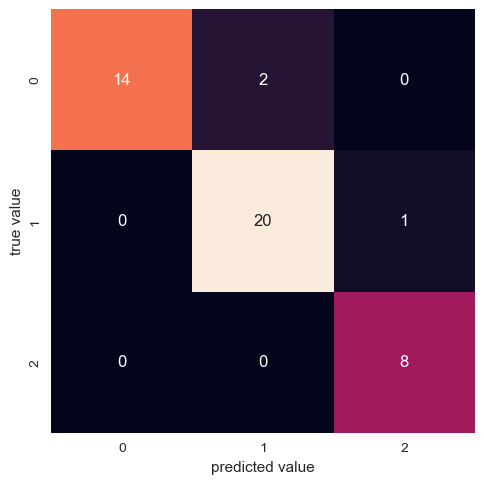

In [40]:
# TO DO: Print confusion matrix using a heatmap
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [12]:
# TO DO: Print classification report

### Questions (6 marks)
1. How do the training and validation accuracy change depending on the method used? Explain with values.
1. What are two reasons why the support vector machines model did not work as well as the tree-based model?
1. How many samples were incorrectly classified in step 5.2? 
1. In this case, is maximizing precision or recall more important? Why?

*YOUR ANSWERS HERE*

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

## Part 3: Observations/Interpretation (3 marks)

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.


*ADD YOUR FINDINGS HERE*

## Part 4: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

## Part 5: Bonus Question (3 marks)

Repeat Part 2 and compare the support vector machines model used to `LinearSVC(max_iter=5000)`. Does using `LinearSVC` improve the results? Why or why not?

Is `LinearSVC` a good fit for this dataset? Why or why not?

In [13]:
# TO DO: ADD YOUR CODE HERE

*ANSWER HERE*

In [14]:
References
1. https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html#sphx-glr-auto-examples-tree-plot-tree-regression-py
2. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
3. https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor
4. Aeberhard,Stefan and Forina,M.. (1991). Wine. UCI Machine Learning Repository. https://doi.org/10.24432/C5PC7J.
5. Yeh, I-C. “Modeling of strength of high-performance concrete using artificial neural networks.” Cement and Concrete research 28.12 (1998): 1797-1808.


SyntaxError: invalid character '“' (U+201C) (253679441.py, line 6)